In [1]:
 #*******************************************************************************************
 #
 #  File Name:  oil_energy_sector.ipynb 
 #
 #  File Description:
 #      This interactive Python notebook, oil_energy_sector.ipynb, analyzes the relationship 
 #      among various economic indicators, the oil industry, and COVID-19 data.
 #      
 #
 #  Date            Description                             Programmer
 #  ----------      ------------------------------------    ------------------
 #  08/12/2023      Initial Development                     Nicholas J. George
 #
 #******************************************************************************************/

import logx
import matplotlibx
import oil_energy_sectorx
import oil_energy_sectorx_constants
import pandasx
import pandasx_constants

import os

import pandas as pd

from datetime import datetime as dt

pd.options.mode.chained_assignment = None

In [2]:
CONSTANT_LOCAL_FILE_NAME = 'oil_energy_sector.ipynb'


logx.set_log_mode(False)

logx.set_image_mode(False)


logx.begin_program('oil_energy_sector')

# <br> **Part 1: Data Acquisition and Preparation**

## **Section 1.1: Crude Oil Prices, S&P 500, Gold Prices, and 10-Year Bond Yields**

### **Economic Indicators**

In [3]:
temp_crude_oil_prices_series \
    = oil_energy_sectorx.return_yahoo_trading_prices \
        (oil_energy_sectorx_constants.CRUDE_OIL_YAHOO_TICKER)

crude_oil_prices_series \
    = pandasx.return_date_indices \
        (temp_crude_oil_prices_series)

logx.log_write_object(crude_oil_prices_series)

In [4]:
temp_sp500_prices_series \
    = oil_energy_sectorx.return_yahoo_trading_prices \
        (oil_energy_sectorx_constants.SP_500_YAHOO_TICKER)

sp500_prices_series \
     = pandasx.return_date_indices \
        (temp_sp500_prices_series)

logx.log_write_object(sp500_prices_series)

In [5]:
temp_gold_prices_series \
    = oil_energy_sectorx.return_yahoo_trading_prices \
        (oil_energy_sectorx_constants.GOLD_YAHOO_TICKER)

gold_prices_series \
    = pandasx.return_date_indices \
        (temp_gold_prices_series)

logx.log_write_object(gold_prices_series)

In [6]:
temp_bond_yield_prices_series \
    = oil_energy_sectorx.return_yahoo_trading_prices \
        (oil_energy_sectorx_constants.TEN_YEAR_BOND_YIELD_YAHOO_TICKER)

bond_yield_prices_series \
    = pandasx.return_date_indices \
        (temp_bond_yield_prices_series)

logx.log_write_object(bond_yield_prices_series)

### **Economic Indicator DataFrame**

In [7]:
economic_indicators_dataframe \
    = pd.DataFrame \
        ({'crude_oil': crude_oil_prices_series,
          'sp500': sp500_prices_series,
          'gold': gold_prices_series,
          'bond_yield': bond_yield_prices_series})

logx.log_write_object(economic_indicators_dataframe)

### **Display Economic Indicator Prices**

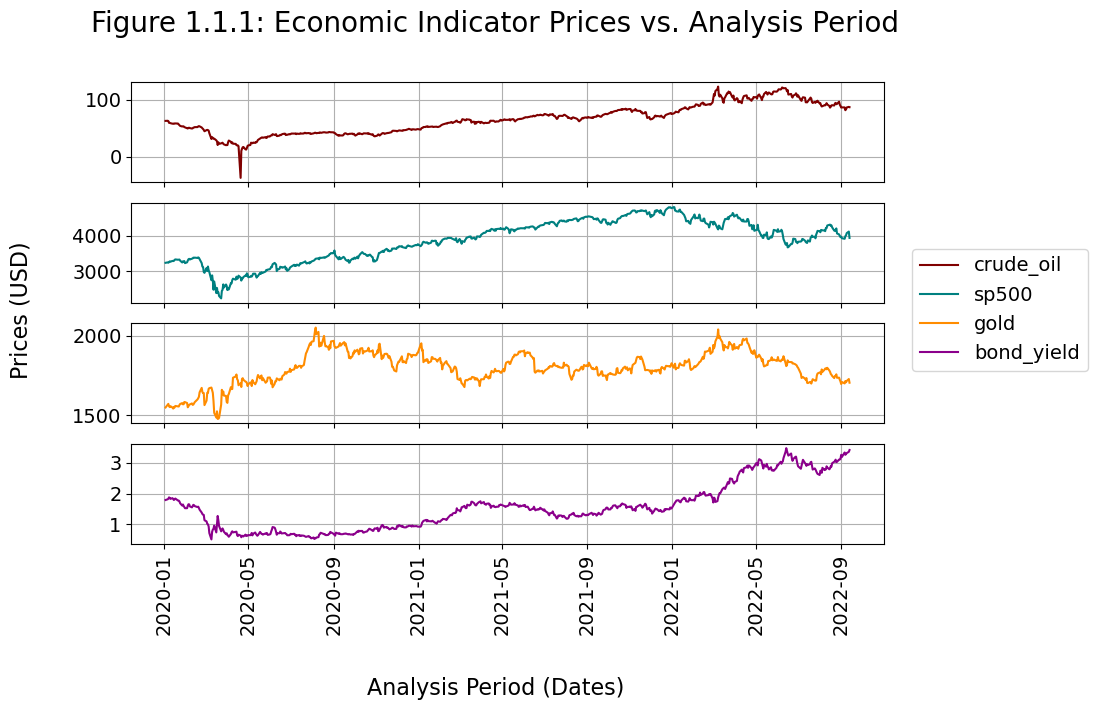

In [8]:
frame_dictionary \
    = {'crude_oil': economic_indicators_dataframe['crude_oil'], 
       'sp500': economic_indicators_dataframe['sp500'],
       'gold': economic_indicators_dataframe['gold'],
       'bond_yield': economic_indicators_dataframe['bond_yield']}

matplotlibx.display_stacked_line_subplots \
    (frame_dictionary,
     'Figure 1.1.1: Economic Indicator Prices vs. Analysis Period',
     oil_energy_sectorx_constants.stacked_line_colors_string_list,
     'Analysis Period (Dates)', 'Prices (USD)', ylabel_string = '')

In [9]:
pandasx.return_formatted_table(economic_indicators_dataframe, 'Table 1.1.1: Economic Indicator Prices') \
    .format({'crude_oil': pandasx_constants.CURRENCY_FLOAT_FORMAT,
             'sp500': pandasx_constants.CURRENCY_FLOAT_FORMAT,
             'gold': pandasx_constants.CURRENCY_FLOAT_FORMAT,
             'bond_yield': pandasx_constants.PERCENT_FLOAT_FORMAT})

crude_oil,sp500,gold,bond_yield
$63.05,"$3,234.85","$1,549.20",1.79%
$63.27,"$3,246.28","$1,566.20",1.81%
$62.70,"$3,237.18","$1,571.80",1.83%
$59.61,"$3,253.05","$1,557.40",1.87%
$59.56,"$3,274.70","$1,551.70",1.86%
$59.04,"$3,265.35","$1,557.50",1.83%
$58.08,"$3,288.13","$1,548.40",1.85%
$58.23,"$3,283.15","$1,542.40",1.82%
$57.81,"$3,289.29","$1,552.10",1.79%
$58.52,"$3,316.81","$1,549.00",1.81%


### **Economic Indicator Price Changes (%)**

In [10]:
crude_oil_prices_percent_change_series \
    = pandasx.convert_to_percent_change(crude_oil_prices_series)

logx.log_write_object(crude_oil_prices_percent_change_series)

In [11]:
sp500_prices_percent_change_series \
    = pandasx.convert_to_percent_change(sp500_prices_series)

logx.log_write_object(sp500_prices_percent_change_series)

In [12]:
gold_prices_percent_change_series \
    = pandasx.convert_to_percent_change(gold_prices_series)

logx.log_write_object(gold_prices_percent_change_series)

In [13]:
bond_yield_prices_percent_change_series \
    = pandasx.convert_to_percent_change(bond_yield_prices_series)

logx.log_write_object(bond_yield_prices_percent_change_series)

### **Economic Indicator Price Changes (%) DataFrame**

In [14]:
economic_indicators_percent_change_dataframe \
    = pd.DataFrame \
        ({'crude_oil%': crude_oil_prices_percent_change_series,
          'sp500%': sp500_prices_percent_change_series,
          'gold%': gold_prices_percent_change_series,
          'bond_yield%': bond_yield_prices_percent_change_series})

logx.log_write_object(economic_indicators_percent_change_dataframe)

### **Display Economic Indicator Price Changes (%)**

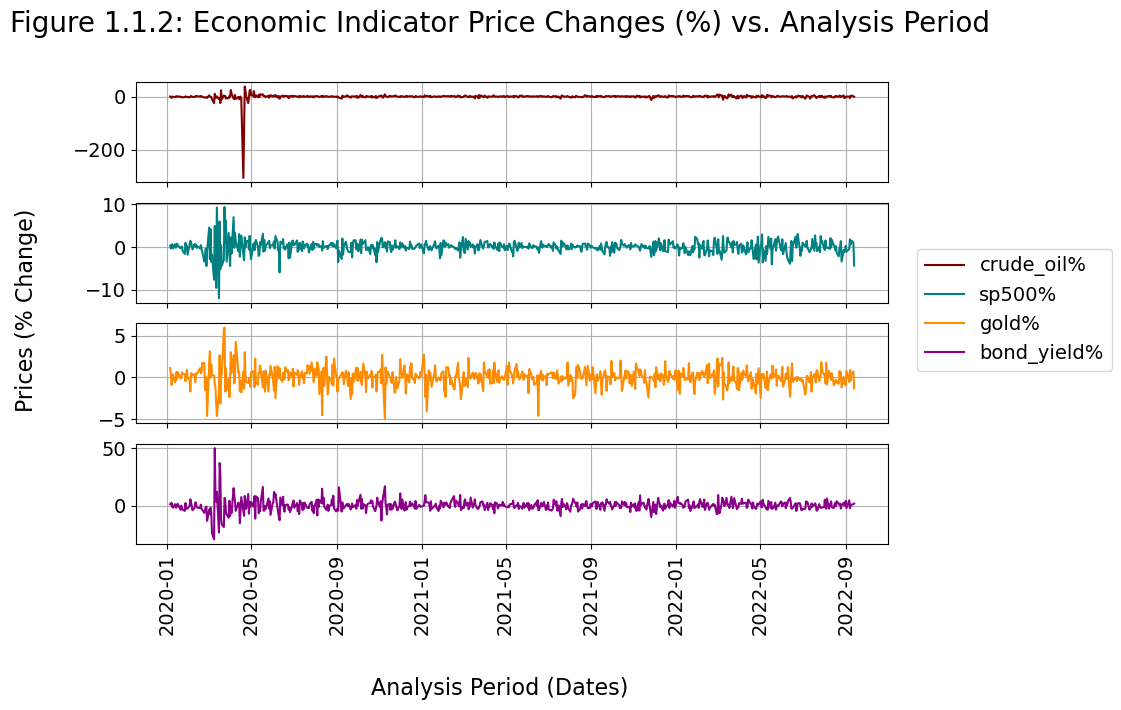

In [15]:
frame_dictionary \
    = {'crude_oil%': economic_indicators_percent_change_dataframe['crude_oil%'], 
       'sp500%': economic_indicators_percent_change_dataframe['sp500%'],
       'gold%': economic_indicators_percent_change_dataframe['gold%'],
       'bond_yield%': economic_indicators_percent_change_dataframe['bond_yield%']}

matplotlibx.display_stacked_line_subplots \
    (frame_dictionary,
     'Figure 1.1.2: Economic Indicator Price Changes (%) vs. Analysis Period',
     oil_energy_sectorx_constants.stacked_line_colors_string_list,
     'Analysis Period (Dates)', 'Prices (% Change)', ylabel_string = '',
     legend_bbox_to_anchor_float_tuple = (1.14, 0.5))

In [16]:
pandasx.return_formatted_table \
    (economic_indicators_percent_change_dataframe[50:60], 
     'Table 1.1.3: Economic Indicator Prices (% Change)') \
        .format({'crude_oil%': pandasx_constants.PERCENT_FLOAT_FORMAT,
                 'sp500%': pandasx_constants.PERCENT_FLOAT_FORMAT,
                 'gold%': pandasx_constants.PERCENT_FLOAT_FORMAT,
                 'bond_yield%': pandasx_constants.PERCENT_FLOAT_FORMAT})

crude_oil%,sp500%,gold%,bond_yield%
-24.42%,-5.18%,-3.12%,26.98%
23.81%,0.47%,0.09%,-11.61%
-11.06%,-4.34%,0.37%,-16.18%
4.15%,-2.93%,5.59%,-18.55%
2.78%,9.38%,5.95%,6.81%
2.00%,1.15%,-1.68%,5.15%
-7.72%,6.24%,1.09%,-5.48%
-4.82%,-3.37%,-1.59%,-7.64%
-6.60%,3.35%,-0.12%,-10.55%
1.94%,-1.60%,-2.38%,4.18%


## **Section 1.2: COVID-19 Data**

### **New COVID-19 Cases and Death Counts (All Countries)**

In [17]:
world_covid_dataframe = oil_energy_sectorx.return_who_covid_data()

logx.log_write_object(world_covid_dataframe)

### **New COVID-19 Cases and Death Counts (USA)**

In [18]:
usa_covid_dataframe \
    = world_covid_dataframe \
        .apply(lambda x: x[world_covid_dataframe['location_key'].isin(['US'])])

logx.log_write_object(usa_covid_dataframe)

### **New COVID-19 Cases and Death Counts (USA) Only on Equity Trading Days**

In [19]:
usa_covid_dataframe['date'] \
    = usa_covid_dataframe['date'] \
        .apply(lambda x: dt.strptime(x,'%Y-%m-%d').date())   

logx.log_write_object(usa_covid_dataframe['date'])

In [20]:
index_string_list = crude_oil_prices_series.index.tolist()

usa_covid_dataframe \
    = usa_covid_dataframe \
        .apply(lambda x: x[usa_covid_dataframe['date'].isin(index_string_list)])

usa_covid_dataframe \
    .set_index('date', drop = True, append = False, inplace = True, verify_integrity = False)

logx.log_write_object(usa_covid_dataframe)

### **Drop Extraneous Columns from COVID-19 Dataset**

In [21]:
updated_usa_covid_dataframe = usa_covid_dataframe[['new_confirmed', 'new_deceased']]

updated_usa_covid_dataframe['new_confirmed'] \
    = updated_usa_covid_dataframe.apply(lambda x: abs(x['new_confirmed']), axis = 1)

updated_usa_covid_dataframe['new_deceased'] \
    = updated_usa_covid_dataframe.apply(lambda x: abs(x['new_deceased']), axis = 1)

updated_usa_covid_dataframe['new_confirmed'] \
    = updated_usa_covid_dataframe['new_confirmed'].astype(int)

updated_usa_covid_dataframe['new_deceased'] \
    = updated_usa_covid_dataframe['new_deceased'].astype(int)

logx.log_write_object(updated_usa_covid_dataframe)

### **Display New COVID-19 Cases and Death Counts (USA)**

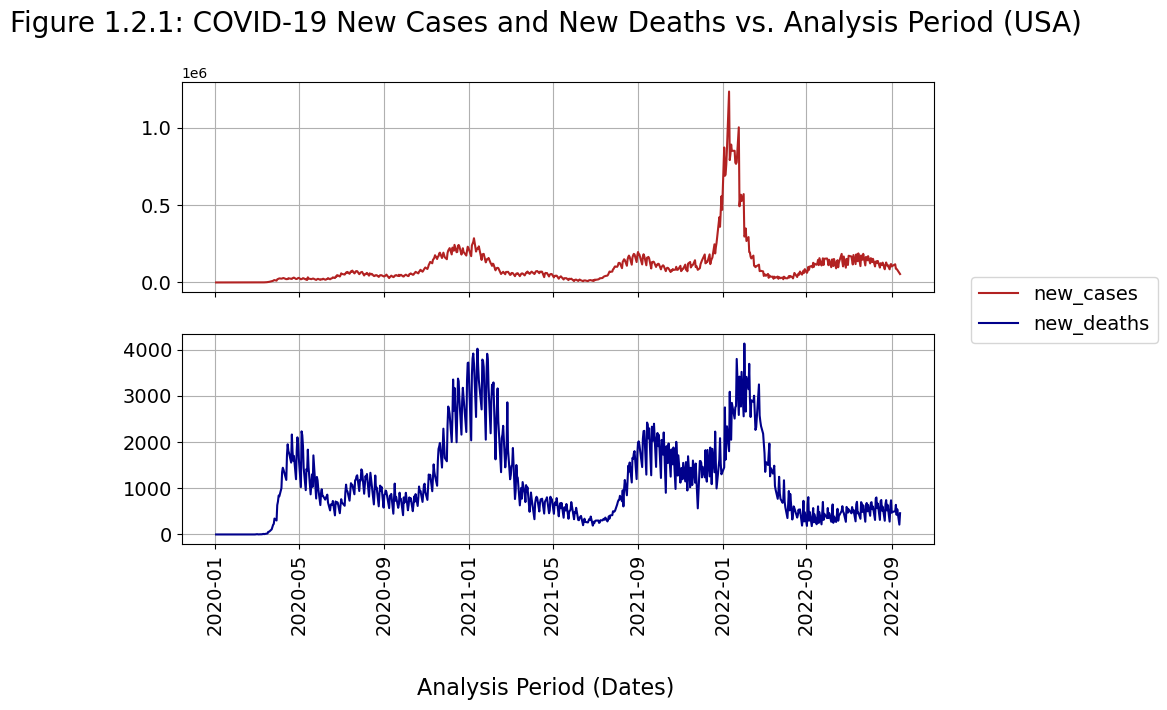

In [22]:
frame_dictionary \
    = {'new_cases': updated_usa_covid_dataframe['new_confirmed'], 
    'new_deaths': updated_usa_covid_dataframe['new_deceased']}

matplotlibx.display_stacked_line_subplots \
    (frame_dictionary,
     'Figure 1.2.1: COVID-19 New Cases and New Deaths vs. Analysis Period (USA)',
     oil_energy_sectorx_constants.covid_colors_string_list,
     'Analysis Period (Dates)', ylabel_string = '',
    legend_bbox_to_anchor_float_tuple = (1.14, 0.5))

In [23]:
pandasx.return_formatted_table \
    (updated_usa_covid_dataframe[50:60], 
     'Table 1.2.1: COVID-19 Cases and Deaths During Analysis Period (USA)',
     hide_index_boolean = False)

,new_confirmed,new_deceased
date,,
2020-03-17,"2,179",22
2020-03-18,"2,769",55
2020-03-19,"3,656",58
2020-03-20,"4,568",68
2020-03-23,"8,047",111
2020-03-24,"8,813",160
2020-03-25,"10,507",207
2020-03-26,"14,048",229
2020-03-27,"15,319",344


r-value:     0.4978
r-squared:   0.2478


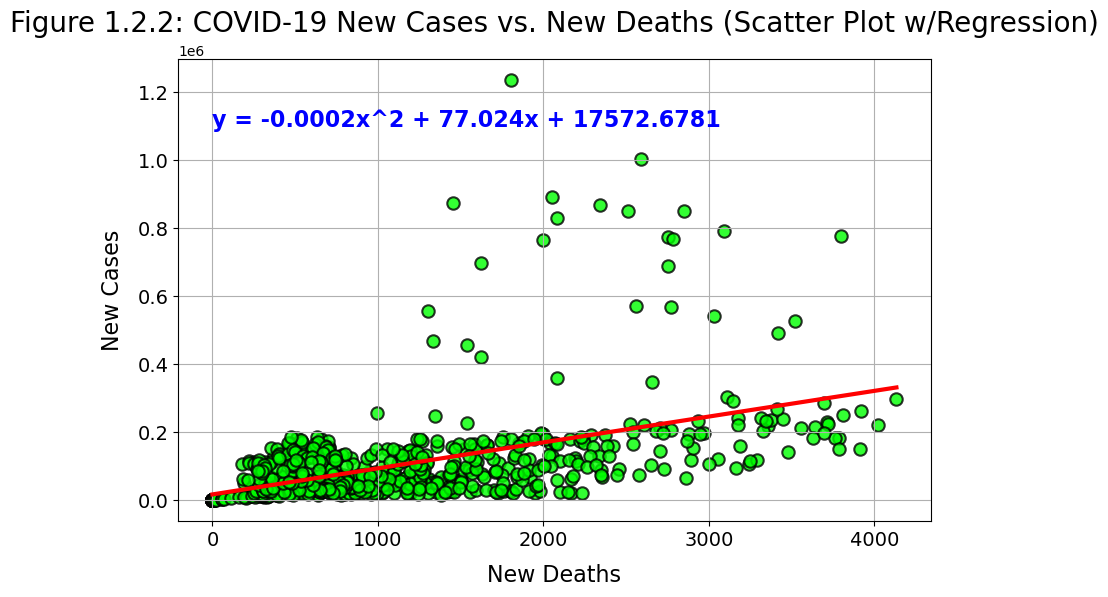

In [24]:
matplotlibx.display_scatter_plot_from_xy_series \
    (updated_usa_covid_dataframe['new_deceased'], updated_usa_covid_dataframe['new_confirmed'],
     'Figure 1.2.2: COVID-19 New Cases vs. New Deaths (Scatter Plot w/Regression)',
     'New Deaths', 'New Cases', 2, 0.0, 1100000.0)

### **Percent Change in COVID-19 Numbers**

In [25]:
covid_new_cases_percent_change_series \
    = pandasx.convert_to_percent_change(updated_usa_covid_dataframe['new_confirmed'])

logx.log_write_object(covid_new_cases_percent_change_series)

In [26]:
covid_deaths_percent_change_series \
    = pandasx.convert_to_percent_change(updated_usa_covid_dataframe['new_deceased'])

logx.log_write_object(covid_deaths_percent_change_series)

### **Percent Change in COVID-19 Numbers DataFrame**

In [27]:
updated_usa_covid_percent_change_dataframe \
    = pd.DataFrame \
        ({'new_confirmed%': covid_new_cases_percent_change_series,
          'new_deceased%': covid_deaths_percent_change_series})

logx.log_write_object(updated_usa_covid_percent_change_dataframe)

### **Display Percent Change in COVID-19 Numbers**

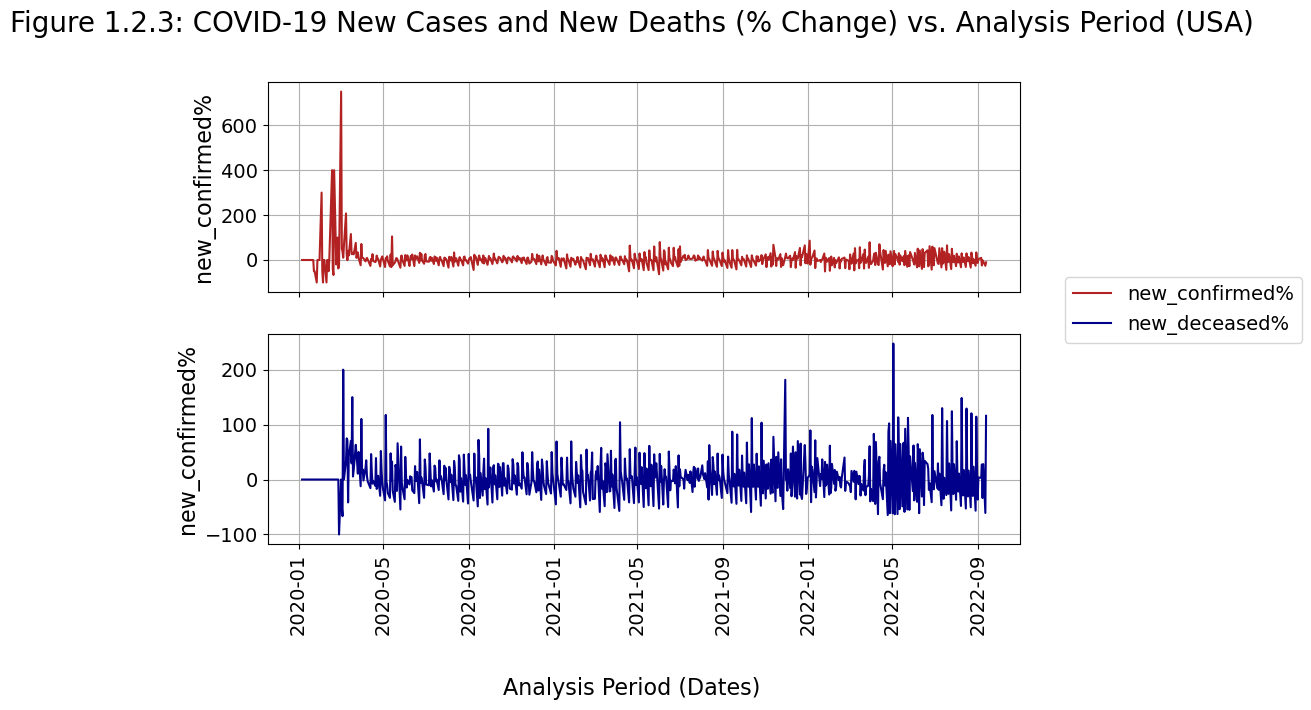

In [28]:
frame_dictionary \
    = {'new_confirmed%': updated_usa_covid_percent_change_dataframe['new_confirmed%'], 
       'new_deceased%': updated_usa_covid_percent_change_dataframe['new_deceased%']}

matplotlibx.display_stacked_line_subplots \
    (frame_dictionary,
     'Figure 1.2.3: COVID-19 New Cases and New Deaths (% Change) vs. Analysis Period (USA)',
     oil_energy_sectorx_constants.covid_colors_string_list, 'Analysis Period (Dates)',
     legend_bbox_to_anchor_float_tuple = (1.2, 0.5))

In [29]:
pandasx.return_formatted_table \
    (updated_usa_covid_percent_change_dataframe[50:60], 
     'Table 1.2.2: COVID-19 New Cases and New Deaths (% Change) (USA)',
     hide_index_boolean = False) \
        .format({'new_confirmed%': pandasx_constants.PERCENT_FLOAT_FORMAT,
                 'new_deceased%': pandasx_constants.PERCENT_FLOAT_FORMAT})

,new_confirmed%,new_deceased%
date,,
2020-03-18,27.08%,150.00%
2020-03-19,32.03%,5.45%
2020-03-20,24.95%,17.24%
2020-03-23,76.16%,63.24%
2020-03-24,9.52%,44.14%
2020-03-25,19.22%,29.38%
2020-03-26,33.70%,10.63%
2020-03-27,9.05%,50.22%
2020-03-30,-23.23%,-12.21%


r-value:     0.2448
r-squared:   0.0599



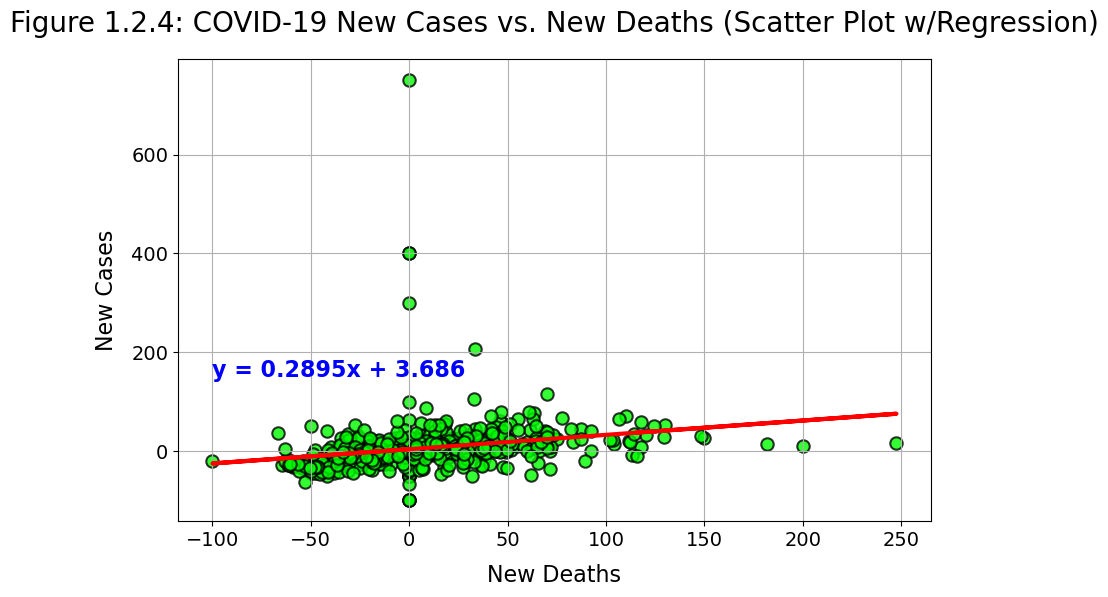

In [30]:
matplotlibx.display_scatter_plot_from_xy_series \
    (updated_usa_covid_percent_change_dataframe['new_deceased%'], 
     updated_usa_covid_percent_change_dataframe['new_confirmed%'],
     'Figure 1.2.4: COVID-19 New Cases vs. New Deaths (Scatter Plot w/Regression)',
     'New Deaths', 'New Cases', 1, -100.0, 150.0)

## **Section 1.3: Oil & Gas Energy Sector Company List**

### **Yahoo Finance API Full Ticker Download**

In [31]:
# This function returns all tickers from Yahoo Finance's database.
ticket_string_list = oil_energy_sectorx.return_complete_ticker_list()

ticket_string_list = [i for i in ticket_string_list if i.isalpha()]

logx.print_and_log_text \
    ('\033[1m' \
     + 'There are {:,} tickers in the complete Yahoo Finance ticker List.' \
         .format(len(ticket_string_list)) \
     + '\033[0m')

There are 10,469 tickers in the complete Yahoo Finance ticker List.


### Oil & Gas Energy Sector Company Data Acquisition

In [ ]:
# These lines of code either generate an oil company csv file or read from it 
# to create a oil company dataframe.
file_exists_boolean = os.path.exists(oil_energy_sectorx_constants.ALL_OIL_COMPANIES_FILE_PATH)

if not file_exists_boolean:
                 
    # These lines of code use the Yahoo Finance API to sort through over 10,000 tickers
    # to find those oil companies that meet certain criteria: associated with one of six
    # oil industries, IPO was at or before first day of analysis period, and daily
    # outstanding shares, daily closing stock prices, company name, industry name, 
    # address, and gross profit are all present. The process takes about an hour to 
    # complete.
    oil_company_dataframe \
        = oil_energy_sectorx.return_oil_energy_sector_companies(ticket_string_list)

    # This line of code takes a precaution by removing any rows with n/a values.
    oil_company_dataframe.dropna(inplace = True)

    # This line of code resets the index if the program removes any rows.
    oil_company_dataframe.reset_index(drop = True, inplace = True)

    # This line of code writes the data to a csv file for future use.
    oil_company_dataframe.to_csv \
        (oil_energy_sectorx_constants.ALL_OIL_COMPANIES_FILE_PATH,
         index_label = 'company_id')
    
else:
                 
    oil_company_dataframe \
        = pd.read_csv \
            (oil_energy_sectorx_constants.ALL_OIL_COMPANIES_FILE_PATH,
             index_col = 'company_id')
  
logx.log_write_object(oil_company_dataframe)


BEGIN RETRIEVING OIL COMPANY INFORMATION...



This ticker, A, belongs to a company that is not in the oil industry. Skipping...


This ticker, AA, belongs to a company that is not in the oil industry. Skipping...


Trading for the ticker, AAA, begins after the first day of the analysis period. Skipping...


This ticker, AAAU, does not have the required information.  Skipping...


This ticker, AACG, belongs to a company that is not in the oil industry. Skipping...


Trading for the ticker, AACI, begins after the first day of the analysis period. Skipping...


Trading for the ticker, AACIU, begins after the first day of the analysis period. Skipping...


This ticker, AACIW, does not have the required information.  Skipping...


Trading for the ticker, AACT, begins after the first day of the analysis period. Skipping...


This ticker, AADI, belongs to a company that is not in the oil industry. Skipping...


This ticker, AADR, does not have the required information.  Skipping...


Tradin

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CBO?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CBO&crumb=5diOJGAHTUt



This ticker, CBO, does not have the required information.  Skipping...


This ticker, CBOE, belongs to a company that is not in the oil industry. Skipping...


This ticker, CBON, does not have the required information.  Skipping...


This ticker, CBRE, belongs to a company that is not in the oil industry. Skipping...


Trading for the ticker, CBRG, begins after the first day of the analysis period. Skipping...


Trading for the ticker, CBRGU, begins after the first day of the analysis period. Skipping...


This ticker, CBRL, belongs to a company that is not in the oil industry. Skipping...


Trading for the ticker, CBSE, begins after the first day of the analysis period. Skipping...


This ticker, CBSH, belongs to a company that is not in the oil industry. Skipping...


This ticker, CBT, belongs to a company that is not in the oil industry. Skipping...


This ticker, CBU, belongs to a company that is not in the oil industry. Skipping...


This ticker, CBUS, belongs to a company that i

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CBX?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CBX&crumb=5diOJGAHTUt



This ticker, CBX, does not have the required information.  Skipping...


This ticker, CBZ, belongs to a company that is not in the oil industry. Skipping...


This ticker, CC, belongs to a company that is not in the oil industry. Skipping...


Trading for the ticker, CCAP, begins after the first day of the analysis period. Skipping...


This ticker, CCB, belongs to a company that is not in the oil industry. Skipping...


This ticker, CCBG, belongs to a company that is not in the oil industry. Skipping...


Trading for the ticker, CCCC, begins after the first day of the analysis period. Skipping...


Trading for the ticker, CCCS, begins after the first day of the analysis period. Skipping...


This ticker, CCD, belongs to a company that is not in the oil industry. Skipping...


Trading for the ticker, CCEF, begins after the first day of the analysis period. Skipping...


This ticker, CCEL, belongs to a company that is not in the oil industry. Skipping...


This ticker, CCEP, belongs to

### Display Oil & Gas Energy Sector Companies

In [ ]:
logx.print_and_log_text \
    ('\033[1m' \
     + 'There are now {:,} '.format(oil_company_dataframe['ticker'].count()) \
     + 'oil companies in the Dataframe.\n' \
     + '\033[0m')

In [ ]:
pandasx.return_formatted_table \
    (oil_company_dataframe, 'Table 1.3: U.S. Oil Energy Sector Companies') \
        .format({'min_market_cap': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT,
                 'max_market_cap': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT,
                 'mean_market_cap': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT,
                 'median_market_cap': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT,
                 'var_market_cap': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT,
                 'stdev_market_cap': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT,
                 'sem_market_cap': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT})

# <br> **Part 2: Oil & Gas Energy Sector (OES) Analysis**

## **Section 2.1: OES By Industry Share Comparison**

### **Oil Industry Share by Number of Companies**

In [ ]:
company_count_by_industry_series \
    = oil_company_dataframe.groupby('industry')['ticker'].count()

logx.log_write_object(company_count_by_industry_series)

In [ ]:
total_companies_in_sector_integer = company_count_by_industry_series.sum()

logx.print_and_log_text \
    ('\033[1m' \
     + 'There are {:,} publically traded oil companies in the Oil Energy Sector.' \
            .format(total_companies_in_sector_integer) \
     + '\033[0m')

In [ ]:
matplotlibx.display_pie_chart_from_series \
    (company_count_by_industry_series,
     'Figure 2.1.1: Oil Industry Share from Number of Companies',
     oil_energy_sectorx_constants.pie_chart_colors_string_list,
     oil_energy_sectorx_constants.industry_explode_float_tuple)

### **Oil Industry Share by Market Capitalization (Mean)**

In [ ]:
mean_market_cap_by_industry_series \
    = oil_company_dataframe.groupby('industry')['mean_market_cap'].sum()

logx.log_write_object(mean_market_cap_by_industry_series)

In [ ]:
total_mean_market_cap_in_sector_float = mean_market_cap_by_industry_series.sum()

logx.print_and_log_text \
    ('\033[1m' \
     + 'There is ${:,.2f} in total market capitalization (mean) ' \
            .format(total_mean_market_cap_in_sector_float) \
     + 'for the Oil Energy Sector.' \
     + '\033[0m')

In [ ]:
matplotlibx.display_pie_chart_from_series \
    (mean_market_cap_by_industry_series,
     'Figure 2.1.2: Oil Industry Share from Market Capitalization (Mean)',
     oil_energy_sectorx_constants.pie_chart_colors_string_list,
     oil_energy_sectorx_constants.industry_explode_float_tuple)

### **Oil Industry Share by Market Capitalization (Median)**

In [ ]:
median_market_cap_by_industry_series \
    = oil_company_dataframe.groupby('industry')['median_market_cap'].sum()

logx.log_write_object(median_market_cap_by_industry_series)

In [ ]:
total_median_market_cap_in_sector_float = median_market_cap_by_industry_series.sum()

logx.print_and_log_text \
    ('\033[1m' \
     + 'There is ${:,.2f} in total market capitalization (median) ' \
            .format(total_median_market_cap_in_sector_float) \
     + 'for the Oil Energy Sector.' \
     + '\033[0m')

In [ ]:
matplotlibx.display_pie_chart_from_series \
    (median_market_cap_by_industry_series,
     'Figure 2.1.3: Oil Industry Share from Market Capitalization (Median)',
     oil_energy_sectorx_constants.pie_chart_colors_string_list,
     oil_energy_sectorx_constants.industry_explode_float_tuple)

### **Oil Industry Share Comparison**

In [ ]:
first_frame_dictionary \
    = {'Company Count': company_count_by_industry_series, 
       'Market Cap (Mean)': mean_market_cap_by_industry_series}

first_pie_charts_dataframe = pd.DataFrame(first_frame_dictionary)

matplotlibx.display_multiple_pie_charts_from_dataframe \
    (first_pie_charts_dataframe,
     'Figure 2.1.4: Company Count vs. Market Cap (Mean)',
     oil_energy_sectorx_constants.pie_chart_colors_string_list,
     oil_energy_sectorx_constants.industry_explode_float_tuple)

In [ ]:
second_frame_dictionary \
    = {'Mean': mean_market_cap_by_industry_series, 
       'Median': median_market_cap_by_industry_series}

second_pie_charts_dataframe = pd.DataFrame(second_frame_dictionary)

matplotlibx.display_multiple_pie_charts_from_dataframe \
    (second_pie_charts_dataframe,
     'Figure 2.1.5: Market Cap (Mean) vs. Market Cap (Median)',
     oil_energy_sectorx_constants.pie_chart_colors_string_list,
     oil_energy_sectorx_constants.industry_explode_float_tuple)

### **Display Oil Company Market Capitalization Metrics**

In [ ]:
pandasx.return_formatted_table \
    (oil_company_dataframe, 'Table 2.2.1: Oil Company Market Capitalization Metrics') \
         .format({'mean_market_cap': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT,
                  'median_market_cap': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT,
                  'stdev_market_cap': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT,
                  'sem_market_cap': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT}) \
         .hide(subset = ['address', 'min_market_cap', 'max_market_cap', 'var_market_cap', 
                         'longitude', 'latitude'], axis = 1)

## **Section 2.2: Market Capitalization (Mean) Analysis**

### **Oil Industry Market Capitalization (Mean) Summary Statistics**

In [ ]:
mean_capitalization_by_industry_statistics_dataframe \
    = oil_energy_sectorx.return_industry_statistics_summary \
        (oil_company_dataframe, 'mean_market_cap')

logx.log_write_object(mean_capitalization_by_industry_statistics_dataframe)

### **Display Oil Industry Market Capitalization (Mean) Summary Statistics**

In [ ]:
matplotlibx.display_box_plot_from_dataframe \
    (oil_company_dataframe,
     'industry', 'mean_market_cap', 
     'Figure 2.2.1: Market Capitalization (Mean) Statistics by Oil Industry', '',
     ylabel_string = 'mean market capitalization (usd)')

In [ ]:
pandasx.return_formatted_table \
    (mean_capitalization_by_industry_statistics_dataframe, 
     'Table 2.2.1: Oil Industry Market Capitalization (Mean) Statistics') \
        .format({'lower_quartile': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT,
                 'upper_quartile': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT,
                 'interquartile_range': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT,
                 'lower_boundary': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT,
                 'upper_boundary': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT,
                 'mean': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT,
                 'median': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT})

## **Section 2.3: Market Capitalization (Median) Analysis**

### **Oil Industry Market Capitalization (Median) Summary Statistics**

In [ ]:
median_capitalization_by_industry_statistics_dataframe \
    = oil_energy_sectorx.return_industry_statistics_summary(oil_company_dataframe, 'median_market_cap')

logx.log_write_object(median_capitalization_by_industry_statistics_dataframe)

### **Display Oil Industry Market Capitalization (Median) Summary Statistics**

In [ ]:
matplotlibx.display_box_plot_from_dataframe \
    (oil_company_dataframe,
     'industry', 'median_market_cap', 
     'Figure 2.3.1: Market Capitalization (Median) Statistics by Oil Industry', '',
     ylabel_string = 'median market capitalization (usd)')

In [ ]:
pandasx.return_formatted_table \
    (median_capitalization_by_industry_statistics_dataframe, 
     'Table 2.3.1: Oil Industry Market Capitalization (Median) Statistics') \
        .format({'lower_quartile': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT,
                 'upper_quartile': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT,
                 'interquartile_range': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT,
                 'lower_boundary': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT,
                 'upper_boundary': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT,
                 'mean': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT,
                 'median': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT})

## **Section 2.4: Other Statistical Measures**

### **Oil Industry Market Capitalization (Standard Deviation) Summary Statistics**

In [ ]:
stdev_capitalization_by_industry_statistics_dataframe \
    = oil_energy_sectorx.return_industry_statistics_summary(oil_company_dataframe, 'stdev_market_cap')

logx.log_write_object(stdev_capitalization_by_industry_statistics_dataframe)

In [ ]:
matplotlibx.display_box_plot_from_dataframe \
    (oil_company_dataframe,
     'industry', 'stdev_market_cap', 
     'Figure 2.4.1: Market Capitalization (Standard Deviation) Statistics by Oil Industry', '',
     ylabel_string = 'stdev market capitalization (usd)')

In [ ]:
pandasx.return_formatted_table \
    (stdev_capitalization_by_industry_statistics_dataframe, 
     'Table 2.4.1: Oil Industry Market Capitalization (Standard Deviation) Statistics') \
        .format({'lower_quartile': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT,
                 'upper_quartile': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT,
                 'interquartile_range': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT,
                 'lower_boundary': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT,
                 'upper_boundary': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT,
                 'mean': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT,
                 'median': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT})

### **Oil Industry Market Capitalization Standard Error of the Mean (SEM) Summary Statistics**

In [ ]:
sem_capitalization_by_industry_statistics_dataframe \
    = oil_energy_sectorx.return_industry_statistics_summary(oil_company_dataframe, 'sem_market_cap')

logx.log_write_object(sem_capitalization_by_industry_statistics_dataframe)

In [ ]:
matplotlibx.display_box_plot_from_dataframe \
    (oil_company_dataframe,
     'industry', 'sem_market_cap', 
     'Figure 2.4.2: Market Capitalization (SEM) Statistics by Oil Industry', '',
     ylabel_string = 'sem market capitalization (usd)')

In [ ]:
pandasx.return_formatted_table \
    (sem_capitalization_by_industry_statistics_dataframe, 
     'Table 2.4.2: Oil Industry Market Capitalization (SEM) Statistics') \
        .format({'lower_quartile': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT,
                 'upper_quartile': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT,
                 'interquartile_range': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT,
                 'lower_boundary': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT,
                 'upper_boundary': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT,
                 'mean': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT,
                 'median': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT})

### **Comparison of Market Capitalization Distributions**

In [ ]:
frame_dictionary \
    = {'mean': oil_company_dataframe['mean_market_cap'], 
       'median': oil_company_dataframe['median_market_cap'],
       'stdev': oil_company_dataframe['stdev_market_cap'],
       'sem': oil_company_dataframe['sem_market_cap']}

market_cap_dataframe = pd.DataFrame(frame_dictionary)

matplotlibx.display_multiple_histograms_from_dataframe \
    (market_cap_dataframe,
     'Figure 2.5.1: Company Count vs. Market Capitalization Histograms',
     oil_energy_sectorx_constants.histogram_colors_string_list,
     'Market Capitalizations (USD)', 'No. of Companies')

# <br> **Part 3: Oil & Gas Energy Sector (OES) Index**

## **Section 3.1: Oil & Gas Energy Sector (OES) Index from All Oil Companies**

### **Index Weights**

In [ ]:
company_index_weights_all_series \
    = oil_company_dataframe['median_market_cap'] / total_median_market_cap_in_sector_float

logx.log_write_object(company_index_weights_all_series)

### **Index Calculation**

In [ ]:
temp_oil_energy_sector_all_index_series \
    = oil_energy_sectorx.return_oil_sector_market_indices \
        (oil_company_dataframe['ticker'].tolist(), \
         company_index_weights_all_series.tolist())

oil_energy_sector_all_index_series \
    = pandasx.return_date_indices(temp_oil_energy_sector_all_index_series)

oil_energy_sector_all_index_series.rename('prices', inplace = True)

logx.log_write_object(oil_energy_sector_all_index_series)

### **Display Oil & Gas Energy Sector (OES) Index from All Oil Companies**

In [ ]:
matplotlibx.display_line_chart_from_dataframe \
    (oil_energy_sector_all_index_series.to_frame(),
     'Figure 3.1.1: OES Index (All)', ['red'],
     'Analyis Period (Dates)', 'Price (USD)')

### **Percent Change Calculation**

In [ ]:
oil_energy_sector_all_index_percent_change_series \
    = pandasx.convert_to_percent_change(oil_energy_sector_all_index_series)

logx.log_write_object(oil_energy_sector_all_index_percent_change_series)

### **Display Oil & Gas Energy Sector (OES) Index from All Oil Companies (% Change)**

In [ ]:
matplotlibx.display_line_chart_from_dataframe \
    (oil_energy_sector_all_index_percent_change_series.to_frame(),
     'Figure 3.1.1: OES Index (All) (% Change)', ['red'],
     'Analyis Period (Dates)', 'Price (USD) (% Change)')

## **Section 3.2: Oil & Gas Energy Sector (OES) Index from Top Oil Companies by Industry**

### **Top Company in Each Oil Industry from Market Capitalization (Median)**

In [ ]:
maximum_median_capitalization_by_industry_series \
    = oil_company_dataframe.groupby('industry')['median_market_cap'].max()

logx.log_write_object(maximum_median_capitalization_by_industry_series)

In [ ]:
top_oil_companies_dataframe \
    = oil_company_dataframe \
        .apply(lambda x: x[oil_company_dataframe['median_market_cap'] \
        .isin(maximum_median_capitalization_by_industry_series.tolist())])

top_oil_companies_dataframe.reset_index(drop = True, inplace = True)

logx.log_write_object(top_oil_companies_dataframe)

### **Display Top Company in Each Oil Industry from Market Capitalization (Median)**

In [ ]:
pandasx.return_formatted_table \
    (top_oil_companies_dataframe, 
     'Table 3.2: Top Company in Each Oil Industry from Market Capitalization (Median)') \
        .format({'min_market_cap': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT,
                 'max_market_cap': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT,
                 'mean_market_cap': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT,
                 'median_market_cap': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT,
                 'var_market_cap': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT,
                 'stdev_market_cap': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT,
                 'sem_market_cap': pandasx_constants.CURRENCY_FLOAT_AS_INTEGER_FORMAT})

## **Section 3.3: Oil & Gas Energy Sector (OES) Index from Top Oil Companies**

### **Total Market Capitalization (Median) for Top Oil Companies**

In [ ]:
total_top_companies_median_capitalization_float \
    = top_oil_companies_dataframe['median_market_cap'].sum()

logx.log_write_object(total_top_companies_median_capitalization_float)

### **Index Weights**

In [ ]:
company_index_weights_top_series \
    = top_oil_companies_dataframe['median_market_cap'] / total_top_companies_median_capitalization_float

logx.log_write_object(company_index_weights_top_series)

### **Index Calculation**

In [ ]:
temp_oil_energy_sector_top_index_series \
    = oil_energy_sectorx.return_oil_sector_market_indices \
        (top_oil_companies_dataframe['ticker'].tolist(), \
         company_index_weights_top_series.tolist())

oil_energy_sector_top_index_series \
    = pandasx.return_date_indices(temp_oil_energy_sector_top_index_series)

logx.log_write_object(oil_energy_sector_top_index_series)

### **Display Oil & Gas Energy Sector (OES) Index from Top Oil Companies**

In [ ]:
matplotlibx.display_line_chart_from_dataframe \
    (oil_energy_sector_top_index_series.to_frame(),
     'Figure 3.3.1: OES (Top) Index', ['blue'],
     'Analyis Period (Dates)', 'Price (USD)')

### **Percent Change Calculation**

In [ ]:
oil_energy_sector_top_index_percent_change_series \
    = pandasx.convert_to_percent_change(oil_energy_sector_top_index_series)

logx.log_write_object(oil_energy_sector_top_index_percent_change_series)

### **Display Oil & Gas Energy Sector (OES) Index from Top Oil Companies (% Change)**

In [ ]:
matplotlibx.display_line_chart_from_dataframe \
    (oil_energy_sector_top_index_percent_change_series.to_frame(),
     'Figure 3.3.2: OES (Top) Index (% Change)', ['blue'],
     'Analyis Period (Dates)', 'Price (USD) (% Change)')

## **Section 3.4: Top Oil Companies vs. All Companies Comparison**

### **Geographic Locations (All Companies)**

In [ ]:
oil_company_geo_dataframe \
     = oil_energy_sectorx.convert_to_geodataframe \
        (oil_company_dataframe, 'median_market_cap', 500000000)

logx.log_write_object(oil_company_geo_dataframe)

In [ ]:
pandasx.display_dataframe_hvplot \
    (oil_company_geo_dataframe,
     'Figure 3.4.1: All Companies World Map',
     'company_name', 'marker_size',
     'longitude', 'latitude', '', '',
     (-180, 180), (-55, 75), 0.4, 'OSM',
     oil_energy_sectorx_constants.geo_hover_columns_string_list)

In [ ]:
pandasx.display_dataframe_hvplot \
    (oil_company_geo_dataframe,
     'Figure 3.4.2: All Companies Americas and Europe Map',
     'company_name', 'marker_size',
     'longitude', 'latitude', '', '',
     (-140, 50), (-35, 70), 0.4, 'OSM',
     oil_energy_sectorx_constants.geo_hover_columns_string_list)

### **Geographic Locations (Top Companies)**

In [ ]:
top_oil_companies_geo_dataframe \
     = oil_energy_sectorx.convert_to_geodataframe \
        (top_oil_companies_dataframe, 'median_market_cap', 500000000)

logx.log_write_object(top_oil_companies_geo_dataframe)

In [ ]:
pandasx.display_dataframe_hvplot \
    (top_oil_companies_geo_dataframe,
     'Figure 3.4.3: Top Companies World Map',
     'company_name', 'marker_size',
     'longitude', 'latitude', '', '',
     (-180, 180), (-55, 75), 0.4, 'OSM',
     oil_energy_sectorx_constants.geo_hover_columns_string_list)

In [ ]:
pandasx.display_dataframe_hvplot \
    (top_oil_companies_geo_dataframe,
     'Figure 3.4.4: Top Companies Americas and Europe Map',
     'company_name', 'marker_size',
     'longitude', 'latitude', '', '',
     (-140, 50), (-35, 70), 0.4, 'OSM',
     oil_energy_sectorx_constants.geo_hover_columns_string_list)

### **Oil Energy Sector (OES) Indices**

In [ ]:
oil_energy_sector_index_dataframe \
    = pd.DataFrame \
        ({'oes_top_index': oil_energy_sector_top_index_series,
          'oes_all_index': oil_energy_sector_all_index_series})

logx.log_write_object(oil_energy_sector_index_dataframe)

### **Display Oil Energy Sector Indices**

In [ ]:
pandasx.return_formatted_table \
    (oil_energy_sector_index_dataframe, 
     'Table 3.4.1: Oil Energy Sector Indices',
     hide_index_boolean = False)

In [ ]:
matplotlibx.display_line_chart_from_dataframe \
    (oil_energy_sector_index_dataframe,
     'Figure 3.4.5: OES (Top) Index and OES (All) Index', 
     oil_energy_sectorx_constants.indices_colors_string_list,
     'Analyis Period (Dates)', 'Price (USD)',
     display_legend_boolean = True)

In [ ]:
matplotlibx.display_scatter_plot_from_xy_series \
    (oil_energy_sector_top_index_series, 
     oil_energy_sector_all_index_series,
     'Figure 3.4.6: OES (All) Index vs. OES (Top) Index (Scatter Plot w/Regression)',
     'OES (Top) Index', 'OES (All) Index', 1, 38.0, 30.0)

### **Oil Energy Sector Indices (% Change)**

In [ ]:
frame_dictionary \
    = {'oes_top_index%': oil_energy_sector_top_index_percent_change_series,
       'oes_all_index%': oil_energy_sector_all_index_percent_change_series}

oil_energy_sector_index_percent_change_dataframe = pd.DataFrame(frame_dictionary)

logx.log_write_object(oil_energy_sector_index_percent_change_dataframe)

### **Display Oil Energy Sector Indices (% Change)**

In [ ]:
matplotlibx.display_stacked_line_subplots \
    (frame_dictionary,
     'Figure 3.4.7: OES (Top) Index and OES (All) Index (% Change)',
     oil_energy_sectorx_constants.indices_colors_string_list,
     'Analysis Period (Dates)', 'Price (USD) (% Change)', ylabel_string = '',
     legend_bbox_to_anchor_float_tuple = (1.19, 0.5))

In [ ]:
matplotlibx.display_line_chart_from_dataframe \
    (oil_energy_sector_index_percent_change_dataframe,
     'Figure 3.4.8: OES (Top) Index and OES (All) Index (% Change)', 
     oil_energy_sectorx_constants.indices_colors_string_list,
     'Analyis Period (Dates)', 'Price (USD) (% Change)',
     display_legend_boolean = True)

In [ ]:
matplotlibx.display_scatter_plot_from_xy_series \
    (oil_energy_sector_top_index_percent_change_series, 
     oil_energy_sector_all_index_percent_change_series,
     'Figure 3.4.9: OES (All) Index vs. OES (Top) Index (% Change) (Scatter Plot w/Regression)',
     'OES (Top) Index', 'OES (All) Index', 1, -12.0, -30.0)

# <br> **Part 4: Oil Energy Sector Analysis**

## **Section 4.1: Crude Oil Prices vs. Oil Energy Sector (OES) Index (Top Companies)**

### **Prices (USD)**

In [ ]:
frame_dictionary \
    = {'crude_oil': economic_indicators_dataframe['crude_oil'],
       'oes_top_index': oil_energy_sector_index_dataframe['oes_top_index']}

crude_oil_top_index_dataframe = pd.DataFrame(frame_dictionary)

logx.log_write_object(crude_oil_top_index_dataframe)

In [ ]:
matplotlibx.display_stacked_line_subplots \
    (frame_dictionary,
     'Figure 4.1.1: Crude Oil and OES (Top) Index',
     oil_energy_sectorx_constants.comparison_colors1_string_list,
     'Analysis Period (Dates)', 'Price (USD)', ylabel_string = '',
     legend_bbox_to_anchor_float_tuple = (1.19, 0.5))

In [ ]:
matplotlibx.display_line_chart_from_dataframe \
    (crude_oil_top_index_dataframe,
     'Figure 4.1.2: Crude Oil and OES (Top) Index',
     oil_energy_sectorx_constants.comparison_colors1_string_list,
     'Analyis Period (Dates)', 'Price (USD)',
     display_legend_boolean = True)

In [ ]:
matplotlibx.display_scatter_plot_from_xy_series \
    (crude_oil_top_index_dataframe['oes_top_index'],
     crude_oil_top_index_dataframe['crude_oil'],
     'Figure 4.1.3: Crude Oil vs. OES (Top) Index (Scatter Plot w/Regression)',
     'OES (Top) Index', 'Crude Oil', 1, 42.0, 28.0)

### **Prices (USD) (% Change)**

In [ ]:
frame_dictionary \
    = {'crude_oil%': economic_indicators_percent_change_dataframe['crude_oil%'],
       'oes_top_index%': oil_energy_sector_index_percent_change_dataframe['oes_top_index%']}

crude_oil_top_index_percent_change_dataframe = pd.DataFrame(frame_dictionary)

logx.log_write_object(crude_oil_top_index_percent_change_dataframe)

In [ ]:
matplotlibx.display_stacked_line_subplots \
    (frame_dictionary,
     'Figure 4.1.4: Crude Oil and OES (Top) Index (% Change)',
     oil_energy_sectorx_constants.comparison_colors1_string_list,
     'Analysis Period (Dates)', 'Price (USD) (% Change)', ylabel_string = '',
     legend_bbox_to_anchor_float_tuple = (1.19, 0.5))

In [ ]:
matplotlibx.display_line_chart_from_dataframe \
    (crude_oil_top_index_percent_change_dataframe,
     'Figure 4.1.5: Crude Oil and OES (Top) Index (% Change)',
     oil_energy_sectorx_constants.comparison_colors1_string_list,
     'Analyis Period (Dates)', 'Price (USD) (% Change)',
     display_legend_boolean = True)

In [ ]:
matplotlibx.display_scatter_plot_from_xy_series \
    (crude_oil_top_index_percent_change_dataframe['oes_top_index%'],
     crude_oil_top_index_percent_change_dataframe['crude_oil%'],
     'Figure 4.1.6: Crude Oil vs. OES (Top) Index (% Change) (Scatter Plot w/Regression)',
     'OES (Top) Index (% Change)', 'Crude Oil (% Change)', 1, -18.0, -60.0)

## **Section 4.2: S&P 500 vs. Oil Energy Sector (OES) Index (Top Companies)**

### **Prices (USD)**

In [ ]:
frame_dictionary \
    = {'sp500': economic_indicators_dataframe['sp500'],
       'oes_top_index': oil_energy_sector_index_dataframe['oes_top_index']}

sp500_top_index_dataframe = pd.DataFrame(frame_dictionary)

logx.log_write_object(sp500_top_index_dataframe)

In [ ]:
matplotlibx.display_stacked_line_subplots \
    (frame_dictionary,
     'Figure 4.2.1: S&P 500  and OES (Top) Index',
     oil_energy_sectorx_constants.comparison_colors2_string_list,
     'Analysis Period (Dates)', 'Price (USD)', ylabel_string = '',
     legend_bbox_to_anchor_float_tuple = (1.16, 0.5))

In [ ]:
matplotlibx.display_line_chart_from_dataframe \
    (sp500_top_index_dataframe,
     'Figure 4.2.2: S&P 500 and OES (Top) Index',
     oil_energy_sectorx_constants.comparison_colors2_string_list,
     'Analyis Period (Dates)', 'Price (USD)',
     display_legend_boolean = True)

In [ ]:
matplotlibx.display_scatter_plot_from_xy_series \
    (sp500_top_index_dataframe['oes_top_index'],
     sp500_top_index_dataframe['sp500'],
     'Figure 4.2.3: S&P 500 vs. OES (Top) Index (Scatter Plot w/Regression)',
     'OES (Top) Index', 'S&P 500', 2, 32.0, 2600.0)

### **Prices (USD) (% Change)**

In [ ]:
frame_dictionary \
    = {'sp500%': economic_indicators_percent_change_dataframe['sp500%'],
       'oes_top_index%': oil_energy_sector_index_percent_change_dataframe['oes_top_index%']}

sp500_top_index_percent_change_dataframe = pd.DataFrame(frame_dictionary)

logx.log_write_object(sp500_top_index_percent_change_dataframe)

In [ ]:
matplotlibx.display_stacked_line_subplots \
    (frame_dictionary,
     'Figure 4.2.4: S&P 500 and OES (Top) Index (% Change)',
     oil_energy_sectorx_constants.comparison_colors2_string_list,
     'Analysis Period (Dates)', 'Price (USD) (% Change)', ylabel_string = '',
     legend_bbox_to_anchor_float_tuple = (1.18, 0.5))

In [ ]:
matplotlibx.display_line_chart_from_dataframe \
    (sp500_top_index_percent_change_dataframe,
     'Figure 4.2.5: S&P 500 and OES (Top) Index (% Change)',
     oil_energy_sectorx_constants.comparison_colors2_string_list,
     'Analyis Period (Dates)', 'Price (USD) (% Change)',
     display_legend_boolean = True)

In [ ]:
matplotlibx.display_scatter_plot_from_xy_series \
    (sp500_top_index_percent_change_dataframe['oes_top_index%'],
     sp500_top_index_percent_change_dataframe['sp500%'],
     'Figure 4.2.6: S&P 500 vs. OES (Top) Index (% Change) (Scatter Plot w/Regression)',
     'OES (Top) Index', 'S&P 500', 1, -12.0, -8.0)

## **Section 4.3: Gold Prices vs. Oil Energy Sector Index (Top)**

### **Prices (USD)**

In [ ]:
frame_dictionary \
    = {'gold': economic_indicators_dataframe['gold'],
       'oes_top_index': oil_energy_sector_index_dataframe['oes_top_index']}

gold_top_index_dataframe = pd.DataFrame(frame_dictionary)

logx.log_write_object(gold_top_index_dataframe)

In [ ]:
matplotlibx.display_stacked_line_subplots \
    (frame_dictionary,
     'Figure 4.3.1: Gold and OES (Top) Index',
     oil_energy_sectorx_constants.comparison_colors3_string_list,
     'Analysis Period (Dates)', 'Price (USD)', ylabel_string = '',
     legend_bbox_to_anchor_float_tuple = (1.16, 0.5))

In [ ]:
matplotlibx.display_line_chart_from_dataframe \
    (gold_top_index_dataframe,
     'Figure 4.3.2: Gold and OES (Top) Index',
     oil_energy_sectorx_constants.comparison_colors3_string_list,
     'Analyis Period (Dates)', 'Price (USD)',
     display_legend_boolean = True)

In [ ]:
matplotlibx.display_scatter_plot_from_xy_series \
    (gold_top_index_dataframe['oes_top_index'],
     gold_top_index_dataframe['gold'],
     'Figure 4.3.3: Gold vs. OES (Top) Index (Scatter Plot w/Regression)',
     'OES (Top) Index', 'Gold', 3, 20.0, 1455.0)

### **Prices (USD) (% Change)**

In [ ]:
frame_dictionary \
    = {'gold%': economic_indicators_percent_change_dataframe['gold%'],
       'oes_top_index%': oil_energy_sector_index_percent_change_dataframe['oes_top_index%']}

gold_top_index_percent_change_dataframe = pd.DataFrame(frame_dictionary)

logx.log_write_object(gold_top_index_percent_change_dataframe)

In [ ]:
matplotlibx.display_stacked_line_subplots \
    (frame_dictionary,
     'Figure 4.3.4: Gold and OES (Top) Index (% Change)',
     oil_energy_sectorx_constants.comparison_colors3_string_list,
     'Analysis Period (Dates)', 'Price (USD) (% Change)', ylabel_string = '',
     legend_bbox_to_anchor_float_tuple = (1.18, 0.5))

In [ ]:
matplotlibx.display_line_chart_from_dataframe \
    (gold_top_index_percent_change_dataframe,
     'Figure 4.3.5: Gold and OES (Top) Index (% Change)',
     oil_energy_sectorx_constants.comparison_colors3_string_list,
     'Analyis Period (Dates)', 'Price (USD) (% Change)',
     display_legend_boolean = True)

In [ ]:
matplotlibx.display_scatter_plot_from_xy_series \
    (gold_top_index_percent_change_dataframe['oes_top_index%'],
     gold_top_index_percent_change_dataframe['gold%'],
     'Figure 4.3.6: Gold vs. OES (Top) Index (% Change) (Scatter Plot w/Regression)',
     'OES (Top) Index', 'Gold', 3, -14.0, -4.0)

## **Section 4.4: 10-Year Bond Yield vs. Oil Energy Sector Index (Top)**

### **Prices (USD)**

In [ ]:
frame_dictionary \
    = {'bond_yield': economic_indicators_dataframe['bond_yield'],
       'oes_top_index': oil_energy_sector_index_dataframe['oes_top_index']}

bond_yield_top_index_dataframe = pd.DataFrame(frame_dictionary)

logx.log_write_object(bond_yield_top_index_dataframe)

In [ ]:
matplotlibx.display_stacked_line_subplots \
    (frame_dictionary,
     'Figure 4.4.1: 10-Year Bond Yield and OES (Top) Index',
     oil_energy_sectorx_constants.comparison_colors4_string_list,
     'Analysis Period (Dates)', 'Price (USD)', ylabel_string = '',
     legend_bbox_to_anchor_float_tuple = (1.16, 0.5))

In [ ]:
matplotlibx.display_line_chart_from_dataframe \
    (bond_yield_top_index_dataframe,
     'Figure 4.4.2: 10-Year Bond Yield and OES (Top) Index',
     oil_energy_sectorx_constants.comparison_colors4_string_list,
     'Analyis Period (Dates)', 'Price (USD)',
     display_legend_boolean = True)

In [ ]:
matplotlibx.display_scatter_plot_from_xy_series \
    (bond_yield_top_index_dataframe['oes_top_index'],
     bond_yield_top_index_dataframe['bond_yield'],
     'Figure 4.4.3: 10-Year Bond Yield vs. OES (Top) Index (Scatter Plot w/Regression)',
     'OES (Top) Index', '10-Year Bond Yield', 2, 36.0, 0.75)

### **Prices (USD) (% Change)**

In [ ]:
frame_dictionary \
    = {'bond_yield%': economic_indicators_percent_change_dataframe['bond_yield%'],
       'oes_top_index%': oil_energy_sector_index_percent_change_dataframe['oes_top_index%']}

bond_yield_top_index_percent_change_dataframe = pd.DataFrame(frame_dictionary)

logx.log_write_object(bond_yield_top_index_percent_change_dataframe)

In [ ]:
matplotlibx.display_stacked_line_subplots \
    (frame_dictionary,
     'Figure 4.4.4: 10-Year Bond Yield and OES (Top) Index (% Change)',
     oil_energy_sectorx_constants.comparison_colors4_string_list,
     'Analysis Period (Dates)', 'Price (USD) (% Change)',  ylabel_string = '',
     legend_bbox_to_anchor_float_tuple = (1.16, 0.5))

In [ ]:
matplotlibx.display_line_chart_from_dataframe \
    (bond_yield_top_index_percent_change_dataframe,
     'Figure 4.4.5: 10-Year Bond Yield and OES (Top) Index (% Change)',
     oil_energy_sectorx_constants.comparison_colors4_string_list,
     'Analyis Period (Dates)', 'Price (USD) (% Change)',
     display_legend_boolean = True)

In [ ]:
matplotlibx.display_scatter_plot_from_xy_series \
    (bond_yield_top_index_percent_change_dataframe['oes_top_index%'],
     bond_yield_top_index_percent_change_dataframe['bond_yield%'],
     'Figure 4.3.6: 10-Year Bond Yield vs. OES (Top) Index (% Change) (Scatter Plot w/Regression)',
     'OES (Top) Index', 'Bond Yield', 3, -16.0, 20.0)

## **Section 4.5: New COVID-19 Cases vs. Oil Energy Sector Index (Top)**

### **Prices (USD)**

In [ ]:
frame_dictionary \
    = {'new_confirmed': updated_usa_covid_dataframe['new_confirmed'],
       'oes_top_index': oil_energy_sector_index_dataframe['oes_top_index']}

new_confirmed_top_index_dataframe = pd.DataFrame(frame_dictionary)

logx.log_write_object(new_confirmed_top_index_dataframe)

In [ ]:
matplotlibx.display_stacked_line_subplots \
    (frame_dictionary,
     'Figure 4.5.1: New Covid Cases and OES (Top) Index',
     oil_energy_sectorx_constants.comparison_colors5_string_list,
     'Analysis Period (Dates)', 'Price (USD)', ylabel_string = '',
     legend_bbox_to_anchor_float_tuple = (1.17, 0.5))

In [ ]:
matplotlibx.display_line_chart_from_dataframe \
    (new_confirmed_top_index_dataframe,
     'Figure 4.5.2: New Covid Cases and OES (Top) Index',
     oil_energy_sectorx_constants.comparison_colors5_string_list,
     'Analyis Period (Dates)', 'Price (USD)',
     display_legend_boolean = True)

In [ ]:
matplotlibx.display_scatter_plot_from_xy_series \
    (new_confirmed_top_index_dataframe['oes_top_index'],
     new_confirmed_top_index_dataframe['new_confirmed'],
     'Figure 4.5.3: New Covid Cases vs. OES (Top) Index (Scatter Plot w/Regression)',
     'OES (Top) Index', 'New Covid Cases', 1, 16.0, 310000.0)

### **Prices (USD) (% Change)**

In [ ]:
frame_dictionary \
    = {'new_confirmed%': updated_usa_covid_percent_change_dataframe['new_confirmed%'],
       'oes_top_index%': oil_energy_sector_index_percent_change_dataframe['oes_top_index%']}

new_confirmed_top_index_percent_change_dataframe = pd.DataFrame(frame_dictionary)

logx.log_write_object(new_confirmed_top_index_percent_change_dataframe)

In [ ]:
matplotlibx.display_stacked_line_subplots \
    (frame_dictionary,
     'Figure 4.5.4: New Covid Cases and OES (Top) Index (% Change)',
     oil_energy_sectorx_constants.comparison_colors5_string_list,
     'Analysis Period (Dates)', 'Price (USD) (% Change)', ylabel_string = '',
     legend_bbox_to_anchor_float_tuple = (1.19, 0.5))

In [ ]:
matplotlibx.display_line_chart_from_dataframe \
    (new_confirmed_top_index_percent_change_dataframe,
     'Figure 4.5.5: New Covid Cases and OES (Top) Index (% Change)',
     oil_energy_sectorx_constants.comparison_colors5_string_list,
     'Analyis Period (Dates)', 'Price (USD) (% Change)',
     display_legend_boolean = True)

In [ ]:
matplotlibx.display_scatter_plot_from_xy_series \
    (new_confirmed_top_index_percent_change_dataframe['oes_top_index%'],
     new_confirmed_top_index_percent_change_dataframe['new_confirmed%'],
     'Figure 4.5.6: New Covid Cases vs. OES (Top) Index (% Change) (Scatter Plot w/Regression)',
     'OES (Top) Index', 'New Covid Cases', 3, -16.0, 160.0)

## **Section 4.6: New COVID-19 Deaths vs. Oil Energy Sector Index (Top)**

### **Prices (USD)**

In [ ]:
frame_dictionary \
    = {'new_deceased': updated_usa_covid_dataframe['new_deceased'],
       'oes_top_index': oil_energy_sector_index_dataframe['oes_top_index']}

new_deceased_top_index_dataframe = pd.DataFrame(frame_dictionary)

logx.log_write_object(new_deceased_top_index_dataframe)

In [ ]:
matplotlibx.display_stacked_line_subplots \
    (frame_dictionary,
     'Figure 4.6.1: New Covid Deaths and OES (Top) Index',
     oil_energy_sectorx_constants.comparison_colors6_string_list,
     'Analysis Period (Dates)', 'Price (USD)', ylabel_string = '',
     legend_bbox_to_anchor_float_tuple = (1.16, 0.5))

In [ ]:
matplotlibx.display_line_chart_from_dataframe \
    (new_deceased_top_index_dataframe,
     'Figure 4.6.2: New Covid Deaths and OES (Top) Index',
     oil_energy_sectorx_constants.comparison_colors6_string_list,
     'Analyis Period (Dates)', 'Price (USD)',
     display_legend_boolean = True)

In [ ]:
matplotlibx.display_scatter_plot_from_xy_series \
    (new_deceased_top_index_dataframe['oes_top_index'],
     new_deceased_top_index_dataframe['new_deceased'],
     'Figure 4.6.3: New Covid Deaths vs. OES (Top) Index (Scatter Plot w/Regression)',
     'OES (Top) Index', 'New Covid Deaths', 2, 18.0, 4000.0)

### **Prices (USD) (% Change)**

In [ ]:
frame_dictionary \
    = {'new_deceased%': updated_usa_covid_percent_change_dataframe['new_deceased%'],
       'oes_top_index%': oil_energy_sector_index_percent_change_dataframe['oes_top_index%']}

new_deceased_top_index_percent_change_dataframe = pd.DataFrame(frame_dictionary)

logx.log_write_object(new_deceased_top_index_percent_change_dataframe)

In [ ]:
matplotlibx.display_stacked_line_subplots \
    (frame_dictionary,
     'Figure 4.6.4: New Covid Deaths and OES (Top) Index (% Change)',
     oil_energy_sectorx_constants.comparison_colors6_string_list,
     'Analysis Period (Dates)', 'Price (USD) (% Change)', ylabel_string = '',
     legend_bbox_to_anchor_float_tuple = (1.18, 0.5))

In [ ]:
matplotlibx.display_line_chart_from_dataframe \
    (new_confirmed_top_index_percent_change_dataframe,
     'Figure 4.6.5: New Covid Deaths and OES (Top) Index (% Change)',
     oil_energy_sectorx_constants.comparison_colors6_string_list,
     'Analyis Period (Dates)', 'Price (USD) (% Change)',
     display_legend_boolean = True)

In [ ]:
matplotlibx.display_scatter_plot_from_xy_series \
    (new_deceased_top_index_percent_change_dataframe['oes_top_index%'],
     new_deceased_top_index_percent_change_dataframe['new_deceased%'],
     'Figure 4.6.6: New Covid Deaths vs. OES (Top) Index (% Change) (Scatter Plot w/Regression)',
     'OES (Top) Index', 'New Covid Deaths', 3, -16.0, 160.0)

## **Section 4.7: Correlation Matrices**

### **Merge DataFrames**

In [ ]:
complete_study_dataframe \
    = pd.concat \
        ([oil_energy_sector_index_dataframe, 
          economic_indicators_dataframe, 
          updated_usa_covid_dataframe], 
         axis = 1)

logx.log_write_object(complete_study_dataframe)

In [ ]:
complete_study_percent_change_dataframe \
    = pd.concat \
        ([oil_energy_sector_index_percent_change_dataframe, 
          economic_indicators_percent_change_dataframe, 
          updated_usa_covid_percent_change_dataframe], 
         axis = 1)

logx.log_write_object(complete_study_percent_change_dataframe)

### Display **Correlation Matrices**

In [ ]:
pandasx.return_formatted_table \
    (complete_study_dataframe.corr(), 
     'Table 4.7.1: All Metrics Correlation Matrix',
     hide_index_boolean = False)

In [ ]:
captionString \
    = 'Table 4.7.2: All Metrics (% Change) Correlation Matrix'

pandasx.return_formatted_table \
    (complete_study_percent_change_dataframe.corr(), 
     'Table 4.7.2: All Metrics (% Change) Correlation Matrix',
     hide_index_boolean = False)

In [ ]:
#log_subroutine \
#    .EndProgramExecution()